In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

cmd = os.path.dirname(sys.path[0])
print(cmd)
sys.path.append(os.path.join(cmd,"3DTomoGAN"))
sys.path.append(os.path.join(cmd,"Results"))

import utils
from PIL import Image


%reload_ext autoreload
%autoreload 2

f:\Repos\4D_CT


In [23]:
loc = os.path.join(cmd,"")
gt = np.asarray(Image.open(os.path.join(loc,'gt.png')), dtype=np.float32)
pred = np.asarray(Image.open(os.path.join(loc, 'pred.png')), dtype=np.float32)

gt = np.squeeze(np.mean(gt, axis=2))
pred = np.squeeze(np.mean(pred, axis=2))

print(gt.shape)

(1259, 1526)


In [45]:
pred = gt + 255*np.random.poisson(lam=0.1, size= gt.shape)
ssim = utils.calc_ssim(gt, pred)
psnr = utils.calc_psnr(gt, pred)

# from ignite.metrics import SSIM, PSNR
import torch


# metric = SSIM(data_range=255)
# metric.attach(default_evaluator, 'ssim')

# print(metric.update((torch.from_numpy(pred).unsqueeze(0).unsqueeze(0), torch.from_numpy(gt).unsqueeze(0).unsqueeze(0))) )

# noise = PSNR(data_range=255)

# print(noise.update((torch.from_numpy(pred).unsqueeze(0).unsqueeze(0), torch.from_numpy(gt).unsqueeze(0).unsqueeze(0))) )



7680.978695618112
7680.968439211405


In [46]:
print(ssim)
print(psnr)

0.6964898971492859
9.58906913537479


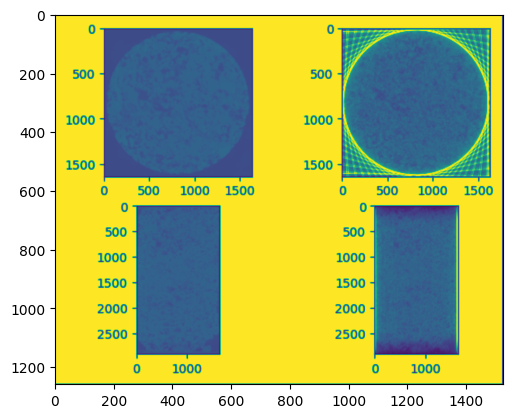

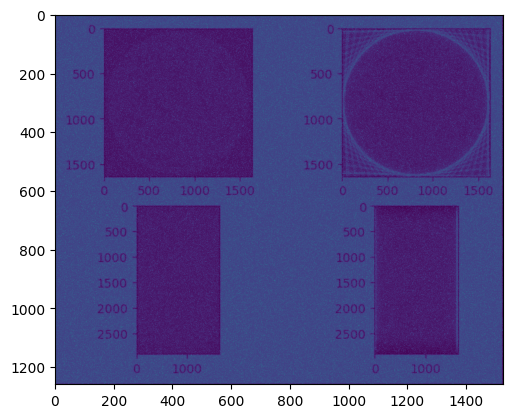

In [47]:
plt.imshow(gt)
plt.show()
plt.imshow(pred)
plt.show()